## MODEL Building
##### Since only small proportion of data is low rental risk, we used oversampling technique to overcome this problem.

### Over sampling dataset 

In [79]:
#importing modules
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing and reading data

In [4]:
#Defining path for oversampling data with nan columns droped
path=Path('Resources/Cleaned_data/over_samp_col.csv')

In [6]:
#importing over sampling dataset
df = pd.read_csv(path)
#looking the few rows
df.head()

,name,dob,houseID,houseZip,paymentDate,paymentAmount,rentAmount,age,city,county,state,status
0,Karima Germany,1951-05-23,1192,92154,1,1321.0,1321.0,71,San Diego,San Diego County,CA,low risk
1,Agustina Spargo,1900-01-01,21,92111,1,2289.0,2289.0,122,San Diego,San Diego County,CA,low risk
2,Lucilla Broderick,1900-01-01,1474,92159,1,1439.0,1439.0,122,San Diego,San Diego County,CA,low risk
3,Russ Mchale,1977-04-20,2015,92137,1,1744.0,1744.0,45,San Diego,San Diego County,CA,low risk
4,Carmelita Ritzer,1969-03-09,311,92136,1,1471.0,1471.0,53,San Diego,San Diego County,CA,low risk


In [7]:
# looking the status columns
df.status.value_counts()

low risk     52640
high risk    52640
Name: status, dtype: int64

## Since many has date of birth as 1900-01-01, which is missing date of birth. 
### As missing date of birth cannot be gussed we neeed to remove it.

In [8]:
# Filtering the age between 1 and 100
df=df.loc[(df['age']>1) & (df['age']<100)]

In [9]:
#looking the few rows
df.head()

,name,dob,houseID,houseZip,paymentDate,paymentAmount,rentAmount,age,city,county,state,status
0,Karima Germany,1951-05-23,1192,92154,1,1321.0,1321.0,71,San Diego,San Diego County,CA,low risk
3,Russ Mchale,1977-04-20,2015,92137,1,1744.0,1744.0,45,San Diego,San Diego County,CA,low risk
4,Carmelita Ritzer,1969-03-09,311,92136,1,1471.0,1471.0,53,San Diego,San Diego County,CA,low risk
5,Clifton Ellwood,1993-11-02,430,92103,1,1233.0,1233.0,29,San Diego,San Diego County,CA,low risk
8,Lashawn Rotella,1985-12-05,1336,92190,1,1930.0,1930.0,37,San Diego,San Diego County,CA,low risk


In [11]:
# looking the status columns after dropping nan date of birth
df["status"].value_counts()

low risk     26335
high risk    25670
Name: status, dtype: int64

In [12]:
#shape of dataframe
df.shape

(52005, 12)

In [13]:
#Columns of the dataframe
df.columns

Index(['name', 'dob', 'houseID', 'houseZip', 'paymentDate', 'paymentAmount',
       'rentAmount', 'age', 'city', 'county', 'state', 'status'],
      dtype='object')

# Making feature matrix and target

In [14]:
# Only selecting important columns for machine learning
rent_df=df[[ 'houseZip', 'paymentDate', 'paymentAmount','rentAmount', 'age', 'status']]

In [15]:
# Creating feature matrix (X) by selecting all columns except 'status'
X=rent_df.drop('status', axis=1) 

# Creating response vector (y) by selecting 'status' column and converting to numpy
y=rent_df['status'].values 

In [16]:
#looking the few rows of X datafrmae
X.head()

,houseZip,paymentDate,paymentAmount,rentAmount,age
0,92154,1,1321.0,1321.0,71
3,92137,1,1744.0,1744.0,45
4,92136,1,1471.0,1471.0,53
5,92103,1,1233.0,1233.0,29
8,92190,1,1930.0,1930.0,37


# Converting the categorical data to binary

In [18]:
# Using pd.get_dummies to the zipcode 
X_dummies = pd.get_dummies(X, columns = ['houseZip'])

# Columns of X after dummies
X_dummies.columns


Index(['paymentDate', 'paymentAmount', 'rentAmount', 'age', 'houseZip_92101',
       'houseZip_92102', 'houseZip_92103', 'houseZip_92104', 'houseZip_92105',
       'houseZip_92106', 'houseZip_92107', 'houseZip_92108', 'houseZip_92109',
       'houseZip_92110', 'houseZip_92111', 'houseZip_92112', 'houseZip_92113',
       'houseZip_92114', 'houseZip_92115', 'houseZip_92116', 'houseZip_92117',
       'houseZip_92119', 'houseZip_92120', 'houseZip_92121', 'houseZip_92122',
       'houseZip_92123', 'houseZip_92124', 'houseZip_92126', 'houseZip_92127',
       'houseZip_92128', 'houseZip_92129', 'houseZip_92130', 'houseZip_92131',
       'houseZip_92132', 'houseZip_92133', 'houseZip_92134', 'houseZip_92135',
       'houseZip_92136', 'houseZip_92137', 'houseZip_92138', 'houseZip_92139',
       'houseZip_92140', 'houseZip_92142', 'houseZip_92145', 'houseZip_92147',
       'houseZip_92149', 'houseZip_92150', 'houseZip_92152', 'houseZip_92153',
       'houseZip_92154', 'houseZip_92155', 'houseZip_

In [22]:
#Total columns before and after get_dummies
print(f'Total column before: {X.shape[1]}\nTotal columns after: {X_dummies.shape[1]}')

Total column before: 5
Total columns after: 85


In [23]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 1, 1, ..., 0, 0, 0])

# Spliting data for training set and testing set
###  Training set: Used to train the classifier. (80 percent of the data)
###  Testing set: Used to estimate the error rate of the trained classifier. (20 percent of data)

In [26]:
# Split using train test split 
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label,stratify=y, random_state=42)

# Scaling the data to the same scale

In [27]:
# Using StandardScalr from scikit-lean for scaling the data
scaler = StandardScaler().fit(X_train)

In [28]:
# Scaling the X data by using StandardScaler()
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.63906686, -3.17511235, -1.10547531, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [ 0.63906686,  0.40932804,  0.73073554, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [-1.56478149,  0.31821575, -0.11674639, ..., -0.09488265,
        -0.09945347, -0.09692476],
       ...,
       [-1.56478149,  0.14634483, -0.34787782, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [ 0.63906686, -0.06279929, -0.43776227, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [ 0.63906686, -0.3382069 , -0.42813179, ..., -0.09488265,
        -0.09945347, -0.09692476]])

In [29]:
# Transforming the test dataset 
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.63906686,  0.24159859,  0.47071268, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [ 0.63906686,  1.21691426,  0.62159014, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [-1.56478149, -0.47487534, -1.18572928, ..., -0.09488265,
        -0.09945347, -0.09692476],
       ...,
       [ 0.63906686, -0.52664369, -0.72025625, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [ 0.63906686, -0.71508047, -1.35907785, ..., -0.09488265,
        -0.09945347, -0.09692476],
       [ 0.63906686,  1.32045096,  1.51080413, ..., -0.09488265,
        -0.09945347, -0.09692476]])

# Making function for Model accuracy 
## Function that use only training set
## Function that use both traingin set and testing set ( Only used at the last of ml section)

In [57]:
#defining function for model scoring with training set only
def training_score(model, X_train_scaled=X_train_scaled, y_train=y_train):
    #Printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print(f'The training score of {model} model is: {train_score}')
    print()
    print()
    # Using cross validation 
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=5, scoring='accuracy' )
    print(f'Using k=5 cross validation the accuracy is: {cvs}')
    print(f'Using k=5 cross validation the mean accuracy is: {np.mean(cvs)}')
    print()
    print()
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print(f'Confusion Matrix using Cross validation predict is:\n {cm}')
    print()
    print()
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print(f'Classification report is:\n {cr}')
    print()
    print()
    #Roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=5,method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    # Plotting the roc curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print(f"The ROC Curve using {model} model")
    plt.show()
    print()
    # Area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    print(f'The are under the curve is: {roc_auc}')


In [51]:
#defining function for model scoring with test set
def train_test_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #Accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print(f'The training score of {model} model is: {train_score}')
    print(f'The testing score of {model} model is: {test_score}')
    print()
    print()
    #Confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix by predicting using test data is:\n {cm}')
    print()
    print()
    #classification report
    cr=classification_report(y_test, y_pred)
    print(f'Classification report is:\n {cr}')
    print()
    print()
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print(f"The ROC Curve using {model} model")
    plt.show()
    # Area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print(f'The are under the curve is: {roc_auc}')

In [52]:
#defining function for model scoring 
def model_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #training score
    train_score=model.score(X_train_scaled, y_train)
    #testing score
    test_score=model.score(X_test_scaled, y_test)
    #prediction on test data
    y_pred=model.predict(X_test_scaled)
    #Precission score
    Precision_score=precision_score(y_test, y_pred)
    #Recall
    Recall_score=recall_score(y_test, y_pred)
    #f1-score
    F1_score=f1_score(y_test, y_pred)
    #Area under the curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score, Precision_score, Recall_score,F1_score, roc_auc ]
    return result

# Different Classification models are used for building better model
### 1. Logistic Regression
### 2. Stochastic Gradent Descent Classifier
### 3. Decision Tree Classifier
### 4. Random Forest Classifier
### 5. Extremely Random Trees Classifier
### 6. Ada Boosting Classifier
### 7. Gradient Boosting Classifier

# Hyperparamater tuned using:
### 1. Grid Search CV
### 2. Randomized Search CV

#  Logistic Regression

In [53]:
# Creating a Logistic Regression model 
lr= LogisticRegression()

# Fitting the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

The training score of LogisticRegression() model is: 0.8022203420249724


Using k=5 cross validation the accuracy is: [0.80592232 0.79861556 0.79964107 0.79871795 0.79602564]
Using k=5 cross validation the mean accuracy is: 0.7997845082320149


Confusion Matrix using Cross validation predict is:
 [[11732  7520]
 [  332 19419]]


Classification report is:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75     19252
           1       0.72      0.98      0.83     19751

    accuracy                           0.80     39003
   macro avg       0.85      0.80      0.79     39003
weighted avg       0.85      0.80      0.79     39003



The ROC Curve using LogisticRegression() model


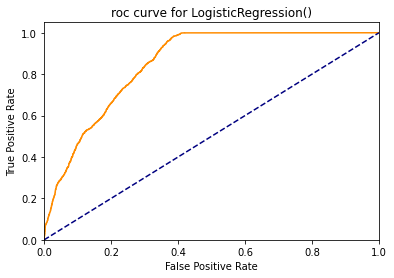


The are under the curve is: 0.8503276503038352


In [58]:
#Score for logistic regression using only training data (Using the defined function training_score)
training_score(lr)

## Tuning hyperparamaters using Grid Search CV for Logistic Regresssion

In [63]:
# Using GridSearchCV
paramater_lr = {'C': [0.001, 0.01,0.1,1, 5, 10],
                 'solver':['lbfgs','saga','liblinear' ],
                 'penalty': [ 'l2'],
                'max_iter':[100,500,1000, 10000]}
gridsearch_lr = GridSearchCV(lr, paramater_lr, cv=5, verbose=1, n_jobs=-1)

In [64]:
#Fitting the logistic regression
gridsearch_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'max_iter': [100, 500, 1000, 10000], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             verbose=1)

In [69]:
# Best parameters for this dataset
print(f'Best paramaters are:\n{gridsearch_lr.best_params_}')
# best score
print(f'Best score is: {gridsearch_lr.best_score_}')

Best paramaters are:
{'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best score is: 0.8000665233582808


The training score of LogisticRegression(C=0.1, max_iter=500, solver='saga') model is: 0.8016050047432248


Using k=5 cross validation the accuracy is: [0.80579413 0.79861556 0.80066658 0.79871795 0.79602564]
Using k=5 cross validation the mean accuracy is: 0.799963972403275


Confusion Matrix using Cross validation predict is:
 [[11721  7531]
 [  326 19425]]


Classification report is:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75     19252
           1       0.72      0.98      0.83     19751

    accuracy                           0.80     39003
   macro avg       0.85      0.80      0.79     39003
weighted avg       0.85      0.80      0.79     39003



The ROC Curve using LogisticRegression(C=0.1, max_iter=500, solver='saga') model


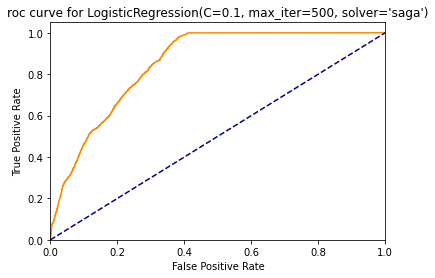


The are under the curve is: 0.8503765133758636


In [70]:
#Defining best estimator
lr_b=gridsearch_lr.best_estimator_
#Score for logistic regression after hyperparamater tuining
training_score(lr_b)

## Stochastic Gradent Descent Classifier

In [71]:
# Creating a sgd classifier model 
sgdc=SGDClassifier(random_state=42, loss='log', penalty='l2')

# Fit the model to the data
sgdc.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

The training score of SGDClassifier(loss='log', random_state=42) model is: 0.7836063892521088


Using k=5 cross validation the accuracy is: [0.80066658 0.78784771 0.7675939  0.7875641  0.78935897]
Using k=5 cross validation the mean accuracy is: 0.7866062536361217


Confusion Matrix using Cross validation predict is:
 [[12472  6780]
 [ 1686 18065]]


Classification report is:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75     19252
           1       0.73      0.91      0.81     19751

    accuracy                           0.78     39003
   macro avg       0.80      0.78      0.78     39003
weighted avg       0.80      0.78      0.78     39003



The ROC Curve using SGDClassifier(loss='log', random_state=42) model


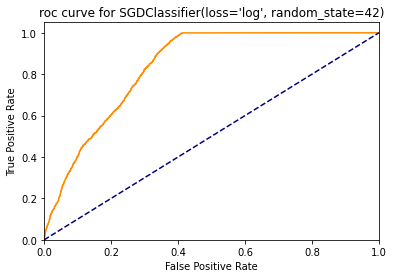


The are under the curve is: 0.835203159346328


In [72]:
#Score for logistic regression using only training data
training_score(sgdc)

### Tuning hyperparamatersfor Stochastic Gradent Descent Classifier

In [74]:
# Using GridSearchCV
paramater_sgdc = {'penalty': ['l1','l2'],
                 'loss':['log', 'modified_huber'],
                 'max_iter':[500,1000, 5000]}
gridsearch_sgdc = GridSearchCV(sgdc, paramater_sgdc, cv=5, verbose=1, n_jobs=-1)

In [75]:
#Fitting after gridsearch
gridsearch_sgdc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=42),
             n_jobs=-1,
             param_grid={'loss': ['log', 'modified_huber'],
                         'max_iter': [500, 1000, 5000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [86]:
# Best parameters for this dataset
print(f'Best paramaters are:\n{gridsearch_sgdc.best_params_}')
# best score
print(f'Best score is: {gridsearch_sgdc.best_score_}')
sgdc_b=gridsearch_sgdc.best_estimator_
print(f'Best estimitar is: {sgdc_b}')

Best paramaters are:
{'loss': 'log', 'max_iter': 500, 'penalty': 'l1'}
Best score is: 0.7874775653351478
Best estimitar is: SGDClassifier(loss='log', max_iter=500, penalty='l1', random_state=42)


The training score of SGDClassifier(loss='log', max_iter=500, penalty='l1', random_state=42) model is: 0.7906058508319873


Using k=5 cross validation the accuracy is: [0.79053967 0.7924625  0.79194975 0.78564103 0.77679487]
Using k=5 cross validation the mean accuracy is: 0.7874775653351478


Confusion Matrix using Cross validation predict is:
 [[12184  7068]
 [ 1279 18472]]


Classification report is:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74     19252
           1       0.72      0.94      0.82     19751

    accuracy                           0.79     39003
   macro avg       0.81      0.78      0.78     39003
weighted avg       0.81      0.79      0.78     39003



The ROC Curve using SGDClassifier(loss='log', max_iter=500, penalty='l1', random_state=42) model


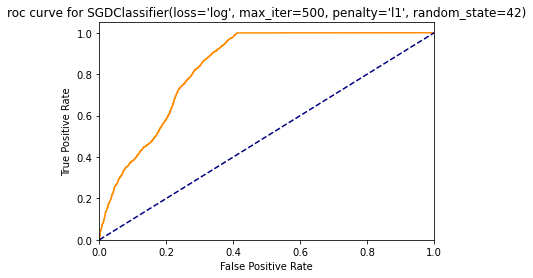


The are under the curve is: 0.8365323453602378


In [88]:
#score for Stochastic Gradent Descent Classifier using training data after hyperparamater tuining
training_score(sgdc_b)

# Tree Based Models

##  1. Decision Tree Classifier

In [81]:
# Creating a Decision Tree model 
dt= DecisionTreeClassifier()

# Fitting the model 
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

The training score of DecisionTreeClassifier() model is: 1.0


Using k=5 cross validation the accuracy is: [1.         0.99961543 0.99987181 1.         1.        ]
Using k=5 cross validation the mean accuracy is: 0.9998974490449942


Confusion Matrix using Cross validation predict is:
 [[19252     0]
 [    0 19751]]


Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19252
           1       1.00      1.00      1.00     19751

    accuracy                           1.00     39003
   macro avg       1.00      1.00      1.00     39003
weighted avg       1.00      1.00      1.00     39003



The ROC Curve using DecisionTreeClassifier() model


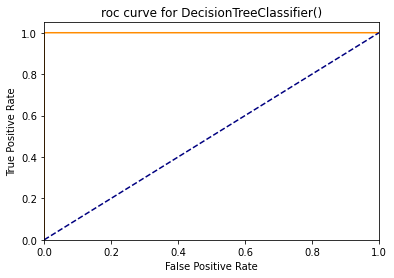


The are under the curve is: 0.9998967708431219


In [82]:
#score for Decision Tree model using only training data
training_score(dt)

### Tuning hyperparamaters for Decision Tree

In [83]:
#### Using GridSearchCV
paramater_dt = {'criterion': ['gini','entropy'],
                'max_depth':[10,100,1000,1000],
                'max_features':['auto','sqrt','log2'],
                'min_samples_leaf':[1,5,10,100]}
gridsearch_dt = GridSearchCV(dt, paramater_dt, cv=5, verbose=1, n_jobs=-1)

In [84]:
#Fitting the model after hyperparamater tuinning
gridsearch_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 100, 1000, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100]},
             verbose=1)

In [85]:
# Best parameters for this dataset
print(f'Best paramaters are:\n{gridsearch_dt.best_params_}')
# best score
print(f'Best score is: {gridsearch_dt.best_score_}')
#best estimator
dt_b=gridsearch_dt.best_estimator_
print(f'Best estimitar is: {dt_b}')

Best paramaters are:
{'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'sqrt', 'min_samples_leaf': 1}
Best score is: 0.999128272184191
Best estimitar is: DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features='sqrt')


The training score of DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features='sqrt') model is: 1.0


Using k=5 cross validation the accuracy is: [0.99923087 0.99935906 0.99871811 0.99871795 0.99884615]
Using k=5 cross validation the mean accuracy is: 0.9989744279990402


Confusion Matrix using Cross validation predict is:
 [[19243     9]
 [   46 19705]]


Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19252
           1       1.00      1.00      1.00     19751

    accuracy                           1.00     39003
   macro avg       1.00      1.00      1.00     39003
weighted avg       1.00      1.00      1.00     39003



The ROC Curve using DecisionTreeClassifier(criterion='entropy', max_depth=1000, max_features='sqrt') model


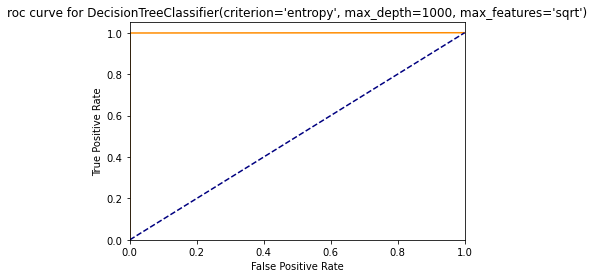


The are under the curve is: 0.9991866336660169


In [89]:
#score for decision tree using training data after hyperparamater tuining
training_score(dt_b)

##  2. Extremely Random Trees


In [90]:
# Creating a Extremely Random Trees model 
rt= ExtraTreesClassifier()

# Fit the model to the scaled data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

The training score of ExtraTreesClassifier() model is: 1.0


Using k=5 cross validation the accuracy is: [0.99897449 0.99935906 0.99935906 0.99923077 1.        ]
Using k=5 cross validation the mean accuracy is: 0.9993846745486279


Confusion Matrix using Cross validation predict is:
 [[19241    11]
 [   19 19732]]


Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19252
           1       1.00      1.00      1.00     19751

    accuracy                           1.00     39003
   macro avg       1.00      1.00      1.00     39003
weighted avg       1.00      1.00      1.00     39003



The ROC Curve using ExtraTreesClassifier() model


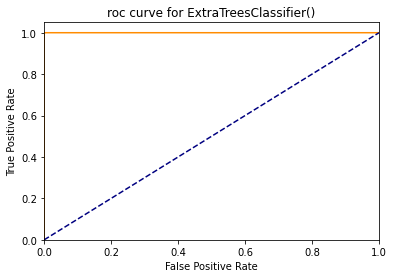


The are under the curve is: 0.9999988757285634


In [91]:
#Score for Extremely Random Trees using only training data (Using our defined function "training_score")
training_score(rt)

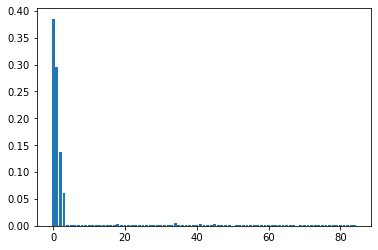

In [92]:
# Looking the columns with it feature importance
features_rt = rt.feature_importances_
# Plotting columns with its importances
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters for Extremely Random Tree Classifier

In [93]:
# Using RandomizedSearchCV (since GridSearch take longer time so using RandomizedSearchCV)
paramater_rt = {'n_estimators':[100,200,500, 1000],
              'criterion': ['gini','entropy'],
              'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000],
                'max_features':['auto','sqrt',]}
randsearch_rt = RandomizedSearchCV(rt, paramater_rt, cv=5, verbose=1, n_jobs=-1)

In [94]:
# Fitting the model after hyperparamater tuining
randsearch_rt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [10, 100, 1000],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=1)

In [96]:
# Best parameters for this dataset
print(f'Best paramaters are:\n{randsearch_rt.best_params_}')
# best score
print(f'Best score is: {randsearch_rt.best_score_}')
#best estimator
rt_b=randsearch_rt.best_estimator_
print(f'Best estimitar is: {rt_b}')


Best paramaters are:
{'n_estimators': 200, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 1000, 'criterion': 'entropy'}
Best score is: 0.9877701313769766
Best estimitar is: ExtraTreesClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=10,
                     n_estimators=200)


The training score of ExtraTreesClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=10,
                     n_estimators=200) model is: 0.9926672307258416


Using k=5 cross validation the accuracy is: [0.98769389 0.98846302 0.98769389 0.98487179 0.98858974]
Using k=5 cross validation the mean accuracy is: 0.9874624653644011


Confusion Matrix using Cross validation predict is:
 [[18728   524]
 [  151 19600]]


Classification report is:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     19252
           1       0.97      0.99      0.98     19751

    accuracy                           0.98     39003
   macro avg       0.98      0.98      0.98     39003
weighted avg       0.98      0.98      0.98     39003



The ROC Curve using ExtraTreesClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=10,
                     n_estimators=200) model


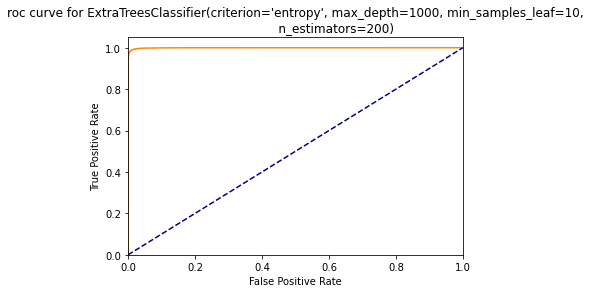


The are under the curve is: 0.9994465691669723


In [97]:
#score for extra tree classifier using training data after hyperparamater tuining
training_score(rt_b)

##  3. Random Forest Classifier

In [99]:
# Creating a Random Forest Classifer model 
rf= RandomForestClassifier()

# Fit the model to the scaled data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

The training score of RandomForestClassifier() model is: 1.0


Using k=5 cross validation the accuracy is: [0.99961543 0.99974362 0.99948725 0.99974359 1.        ]
Using k=5 cross validation the mean accuracy is: 0.999717978299955


Confusion Matrix using Cross validation predict is:
 [[19249     3]
 [    9 19742]]


Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19252
           1       1.00      1.00      1.00     19751

    accuracy                           1.00     39003
   macro avg       1.00      1.00      1.00     39003
weighted avg       1.00      1.00      1.00     39003



The ROC Curve using RandomForestClassifier() model


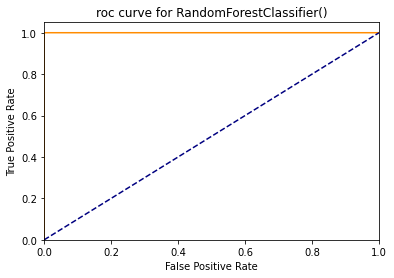


The are under the curve is: 0.9999998579867659


In [100]:
#Score for Random Forest Classifer using only training data
training_score(rf)

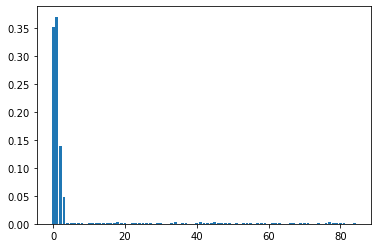

In [101]:
#Looking for the important features
features_rf = rf.feature_importances_
# plotting columns with its importances
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters for Random Forest

In [103]:
#Using randomized search for hyperparamater tuining since the paramaters are large and it make take longer time to tuned
paramater_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
                 'max_features':['auto','sqrt','log2'],
              'max_depth':[1,2,5,10,100,1000],
                'min_samples_leaf':[1,5,10,100,1000]}
randsearch_rf = RandomizedSearchCV(rf, paramater_rf, cv=5, verbose=1, n_jobs=-1)

In [104]:
#Fitting the model after hyperparamater tuining
randsearch_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 5, 10, 100, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 100,
                                                             1000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [105]:
# Best parameters for this dataset
print(f'Best paramaters are:\n{randsearch_rf.best_params_}')
# best score
print(f'Best score is: {randsearch_rf.best_score_}')
#best estimator
rf_b=randsearch_rf.best_estimator_
print(f'Best estimitar is: {rf_b}')

Best paramaters are:
{'n_estimators': 100, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'entropy'}
Best score is: 0.9927698224093557
Best estimitar is: RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10)


The training score of RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10) model is: 0.9960515857754532


Using k=5 cross validation the accuracy is: [0.99397513 0.993206   0.99525702 0.99269231 0.99538462]
Using k=5 cross validation the mean accuracy is: 0.9941030144064371


Confusion Matrix using Cross validation predict is:
 [[19021   231]
 [  136 19615]]


Classification report is:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     19252
           1       0.99      0.99      0.99     19751

    accuracy                           0.99     39003
   macro avg       0.99      0.99      0.99     39003
weighted avg       0.99      0.99      0.99     39003



The ROC Curve using RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10) model


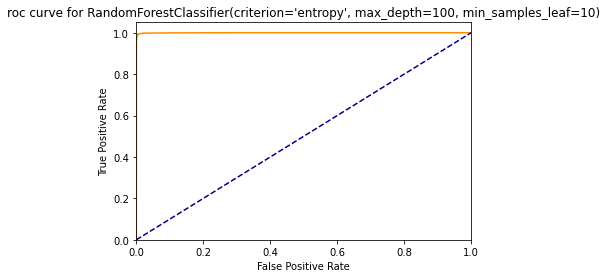


The are under the curve is: 0.9996762834627493


In [106]:
#Score for random forest using training data after hyperparamater tuining
training_score(rf_b)

##  Boosting


### 1. Ada Boosting Classifier

In [107]:
# Creating a AdaBoostClassifier model 
ab= AdaBoostClassifier(base_estimator = dt)

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

The training score of AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) model is: 1.0


Using k=5 cross validation the accuracy is: [1.         0.99961543 0.99987181 1.         1.        ]
Using k=5 cross validation the mean accuracy is: 0.9998974490449942


Confusion Matrix using Cross validation predict is:
 [[19252     0]
 [    0 19751]]


Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19252
           1       1.00      1.00      1.00     19751

    accuracy                           1.00     39003
   macro avg       1.00      1.00      1.00     39003
weighted avg       1.00      1.00      1.00     39003



The ROC Curve using AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) model


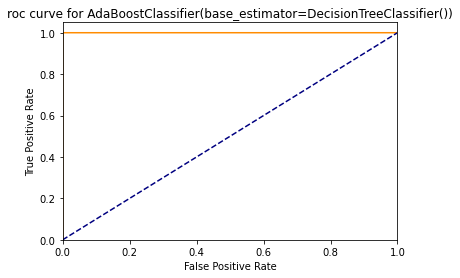


The are under the curve is: 0.9998967708431219


In [108]:
#Score for Adaboost using only training data
training_score(ab)

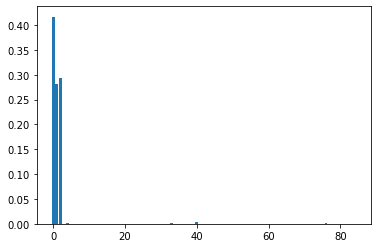

In [109]:
# Looking only important features
features_ab = ab.feature_importances_
# Plotting columns with its importances
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters for AdaBoost Classifier

In [110]:
# Using randomized search cv 
paramater_ab = {'n_estimators':[100,200,500, 1000, 2000, 5000],
             'learning_rate':[0.01,0.1]}
randsearch_ab = RandomizedSearchCV(ab, paramater_ab, cv=3, verbose=1, n_jobs=-1)

In [111]:
#Fitting after hyperparamater tuining
randsearch_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000, 5000]},
                   verbose=1)

In [112]:
# Best parameters for this dataset
print(f'Best paramaters are:\n{randsearch_ab.best_params_}')
# best score
print(f'Best score is: {randsearch_ab.best_score_}')
#best estimator
ab_b=randsearch_ab.best_estimator_
print(f'Best estimitar is: {ab_b}')

Best paramaters are:
{'n_estimators': 100, 'learning_rate': 0.01}
Best score is: 1.0
Best estimitar is: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=100)


The training score of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=100) model is: 1.0


Using k=5 cross validation the accuracy is: [1.         0.99961543 0.99987181 1.         1.        ]
Using k=5 cross validation the mean accuracy is: 0.9998974490449942


Confusion Matrix using Cross validation predict is:
 [[19252     0]
 [    0 19751]]


Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19252
           1       1.00      1.00      1.00     19751

    accuracy                           1.00     39003
   macro avg       1.00      1.00      1.00     39003
weighted avg       1.00      1.00      1.00     39003



The ROC Curve using AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=100) model


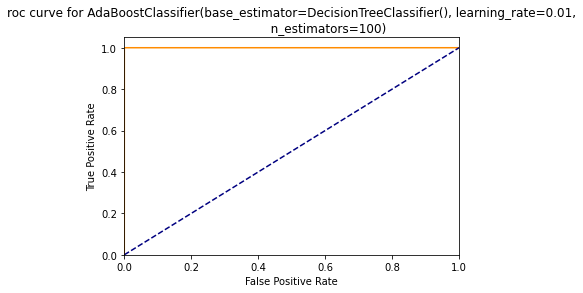


The are under the curve is: 0.9998967708431219


In [114]:
#score for adaboost classifier using training data after hyperparamater tuining
training_score(ab_b)

### 1. Graident Boosting Classifier

In [119]:
# Creating a gradient boost classifer model 
gb= GradientBoostingClassifier()

# Fit the model to the data
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

The training score of AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) model is: 1.0


Using k=5 cross validation the accuracy is: [1.         0.99961543 0.99987181 1.         1.        ]
Using k=5 cross validation the mean accuracy is: 0.9998974490449942


Confusion Matrix using Cross validation predict is:
 [[19252     0]
 [    0 19751]]


Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19252
           1       1.00      1.00      1.00     19751

    accuracy                           1.00     39003
   macro avg       1.00      1.00      1.00     39003
weighted avg       1.00      1.00      1.00     39003



The ROC Curve using AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) model


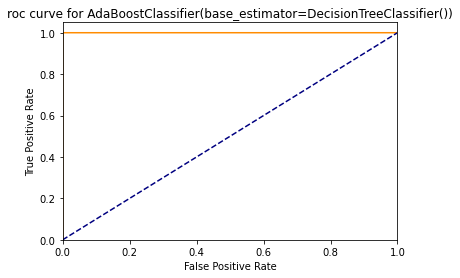


The are under the curve is: 0.9998967708431219


In [120]:
#Score for GradientBoostClassifier using only training data
training_score(ab)

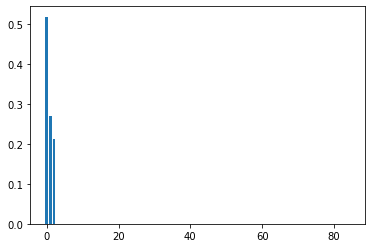

In [122]:
# Looking only important features
features_gb = gb.feature_importances_
# Plotting columns with its importances
plt.bar(x = range(len(features_gb)), height=features_gb)
plt.show()

### Tuning hyperparamaters for Gradient Boosting Classifier

In [ ]:
# Using randomized search cv 
paramater_gb = {'n_estimators':[100,200,1000],
             'learning_rate':[0.01,0.1]}
randsearch_gb = RandomizedSearchCV(gb, paramater_gb, cv=3, verbose=1, n_jobs=-1)

In [ ]:
#Fitting after hyperparamater tuining
randsearch_gb.fit(X_train_scaled, y_train)

In [ ]:
# Best parameters for this dataset
print(f'Best paramaters are:\n{randsearch_gb.best_params_}')
# best score
print(f'Best score is: {randsearch_gb.best_score_}')
#best estimator
gb_b=randsearch_ab.best_estimator_
print(f'Best estimitar is: {gb_b}')

In [ ]:
#score for GradientBoostClassifier using training data after hyperparamater tuining
training_score(gb_b)

# Real and predicted value using different model

In [132]:
#Predected value using test data
y_pred_sgd=sgdc_b.predict(X_test_scaled)
y_pred_lr=lr_b.predict(X_test_scaled)
y_pred_dt=dt_b.predict(X_test_scaled)
y_pred_rf=rf_b.predict(X_test_scaled)
y_pred_rt=rt_b.predict(X_test_scaled)
y_pred_ab=ab_b.predict(X_test_scaled)
y_pred_gb=gb_b.predict(X_test_scaled)

#Creating the dataframe for real and predicted value using different models
df_pred=pd.DataFrame({'Real value':y_test,
                     'SGD Classifier':y_pred_sgd,
                     'Logistic Regression':y_pred_lr,
                     'Decision Tree':y_pred_dt,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_rt,
                     'AdaBoost':y_pred_ab,
                      'Gradient Boost': y_pred_gb})
#Replacing 1 with low risk and 0 with high risk
df_pred.replace({1:'low risk', 0: 'high risk'}, inplace=True)
df_pred

,Real value,SGD Classifier,Logistic Regression,Decision Tree,Random Forest,Extra Random Tree,AdaBoost,Gradient Boost
0,low risk,low risk,low risk,low risk,low risk,low risk,low risk,low risk
1,high risk,low risk,low risk,high risk,high risk,high risk,high risk,high risk
2,high risk,high risk,high risk,high risk,high risk,high risk,high risk,high risk
3,low risk,high risk,low risk,low risk,low risk,low risk,low risk,low risk
4,high risk,high risk,high risk,high risk,high risk,high risk,high risk,high risk
...,...,...,...,...,...,...,...,...
12997,low risk,low risk,low risk,low risk,low risk,low risk,low risk,low risk
12998,high risk,low risk,low risk,high risk,high risk,high risk,high risk,high risk
12999,low risk,high risk,high risk,low risk,low risk,low risk,low risk,low risk
13000,high risk,low risk,low risk,high risk,low risk,high risk,high risk,high risk


In [349]:
# Saving the dataframe
df_pred.to_html('Resources/Cleaned_data/over_pred_test.html')

In [133]:
#making dataframe on evaluation metrices
all_evaluation=pd.DataFrame({'SGD':model_score(sgdc_b),
                            'logistic Reg':model_score(lr_b),
                            'Decision Tree':model_score(dt_b),
                           'Random Forest':model_score(rf_b),
                            'Extra Random Tree':model_score(rt_b),
                           'Ada Boost':model_score(ab_b),
                            'Graident Boost':model_score(gb_b) }
                           ,index=['Train score','Test score', 
                                   'Precision', 'Recall', 'f1_score', 'auc'])
all_evaluation

,SGD,logistic Reg,Decision Tree,Random Forest,Extra Random Tree,Ada Boost,Graident Boost
Train score,0.790606,0.801605,1.000000,0.996052,0.992667,1.0,1.0
Test score,0.788802,0.804799,0.999231,0.995847,0.991001,1.0,1.0
Precision,0.716298,0.725530,1.000000,0.996050,0.987634,1.0,1.0
Recall,0.965219,0.988457,0.998481,0.995747,0.994684,1.0,1.0
f1_score,0.822334,0.836827,0.999240,0.995899,0.991146,1.0,1.0
auc,0.821261,0.847026,0.999241,0.999838,0.999652,1.0,1.0


In [353]:
#Saving the dataframe
all_evaluation.to_html('Resources/Cleaned_data/over_metrics.html')

## Saving the best model

In [154]:
import joblib
joblib.dump(rf_s, 'model.pkl')

['model.pkl']

In [155]:
#saving standard scaler
joblib.dump(scaler1, 'scaler.pkl')

['scaler.pkl']